<a href="https://colab.research.google.com/github/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Driving_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing Required Library**
OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries. You can download and model walkable, drivable, or bikeable urban networks with a single line of Python code then easily analyze and visualize them. You can just as easily download and work with other infrastructure types, amenities/points of interest, building footprints, elevation data, street bearings/orientations, and speed/travel time.

If you use OSMnx in your work, please cite the journal article.

Citation info: Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

In [2]:
pip install osmnx


     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.3 MB 40.5 MB/s 
     |████████████████████████████████| 11.2 MB 56.8 MB/s 
     |████████████████████████████████| 1.0 MB 46.5 MB/s 
     |████████████████████████████████| 1.0 MB 53.8 MB/s 
     |████████████████████████████████| 16.7 MB 50.7 MB/s 
     |████████████████████████████████| 930 kB 48.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requ

In [ ]:
pip install geocoder

     |████████████████████████████████| 98 kB 4.9 MB/s 


In [ ]:
import numpy as np                                         
import pandas as pd
import matplotlib.pyplot as plt                        # Data visualization
import osmnx as ox                                     # Geospatial data from OpenStreetMap
from geopy import distance                              #To calculate driving distance 
from geopy.distance import distance


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/NYC Taxi Data.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.

pd.options.display.float_format = '{:.2f}'.format 

From data visualisation we observe that there are various pickups and dropoff location which lie thousands of miles away from NYC,etc, hence we will use the empirical rule to filter these abnormilities.

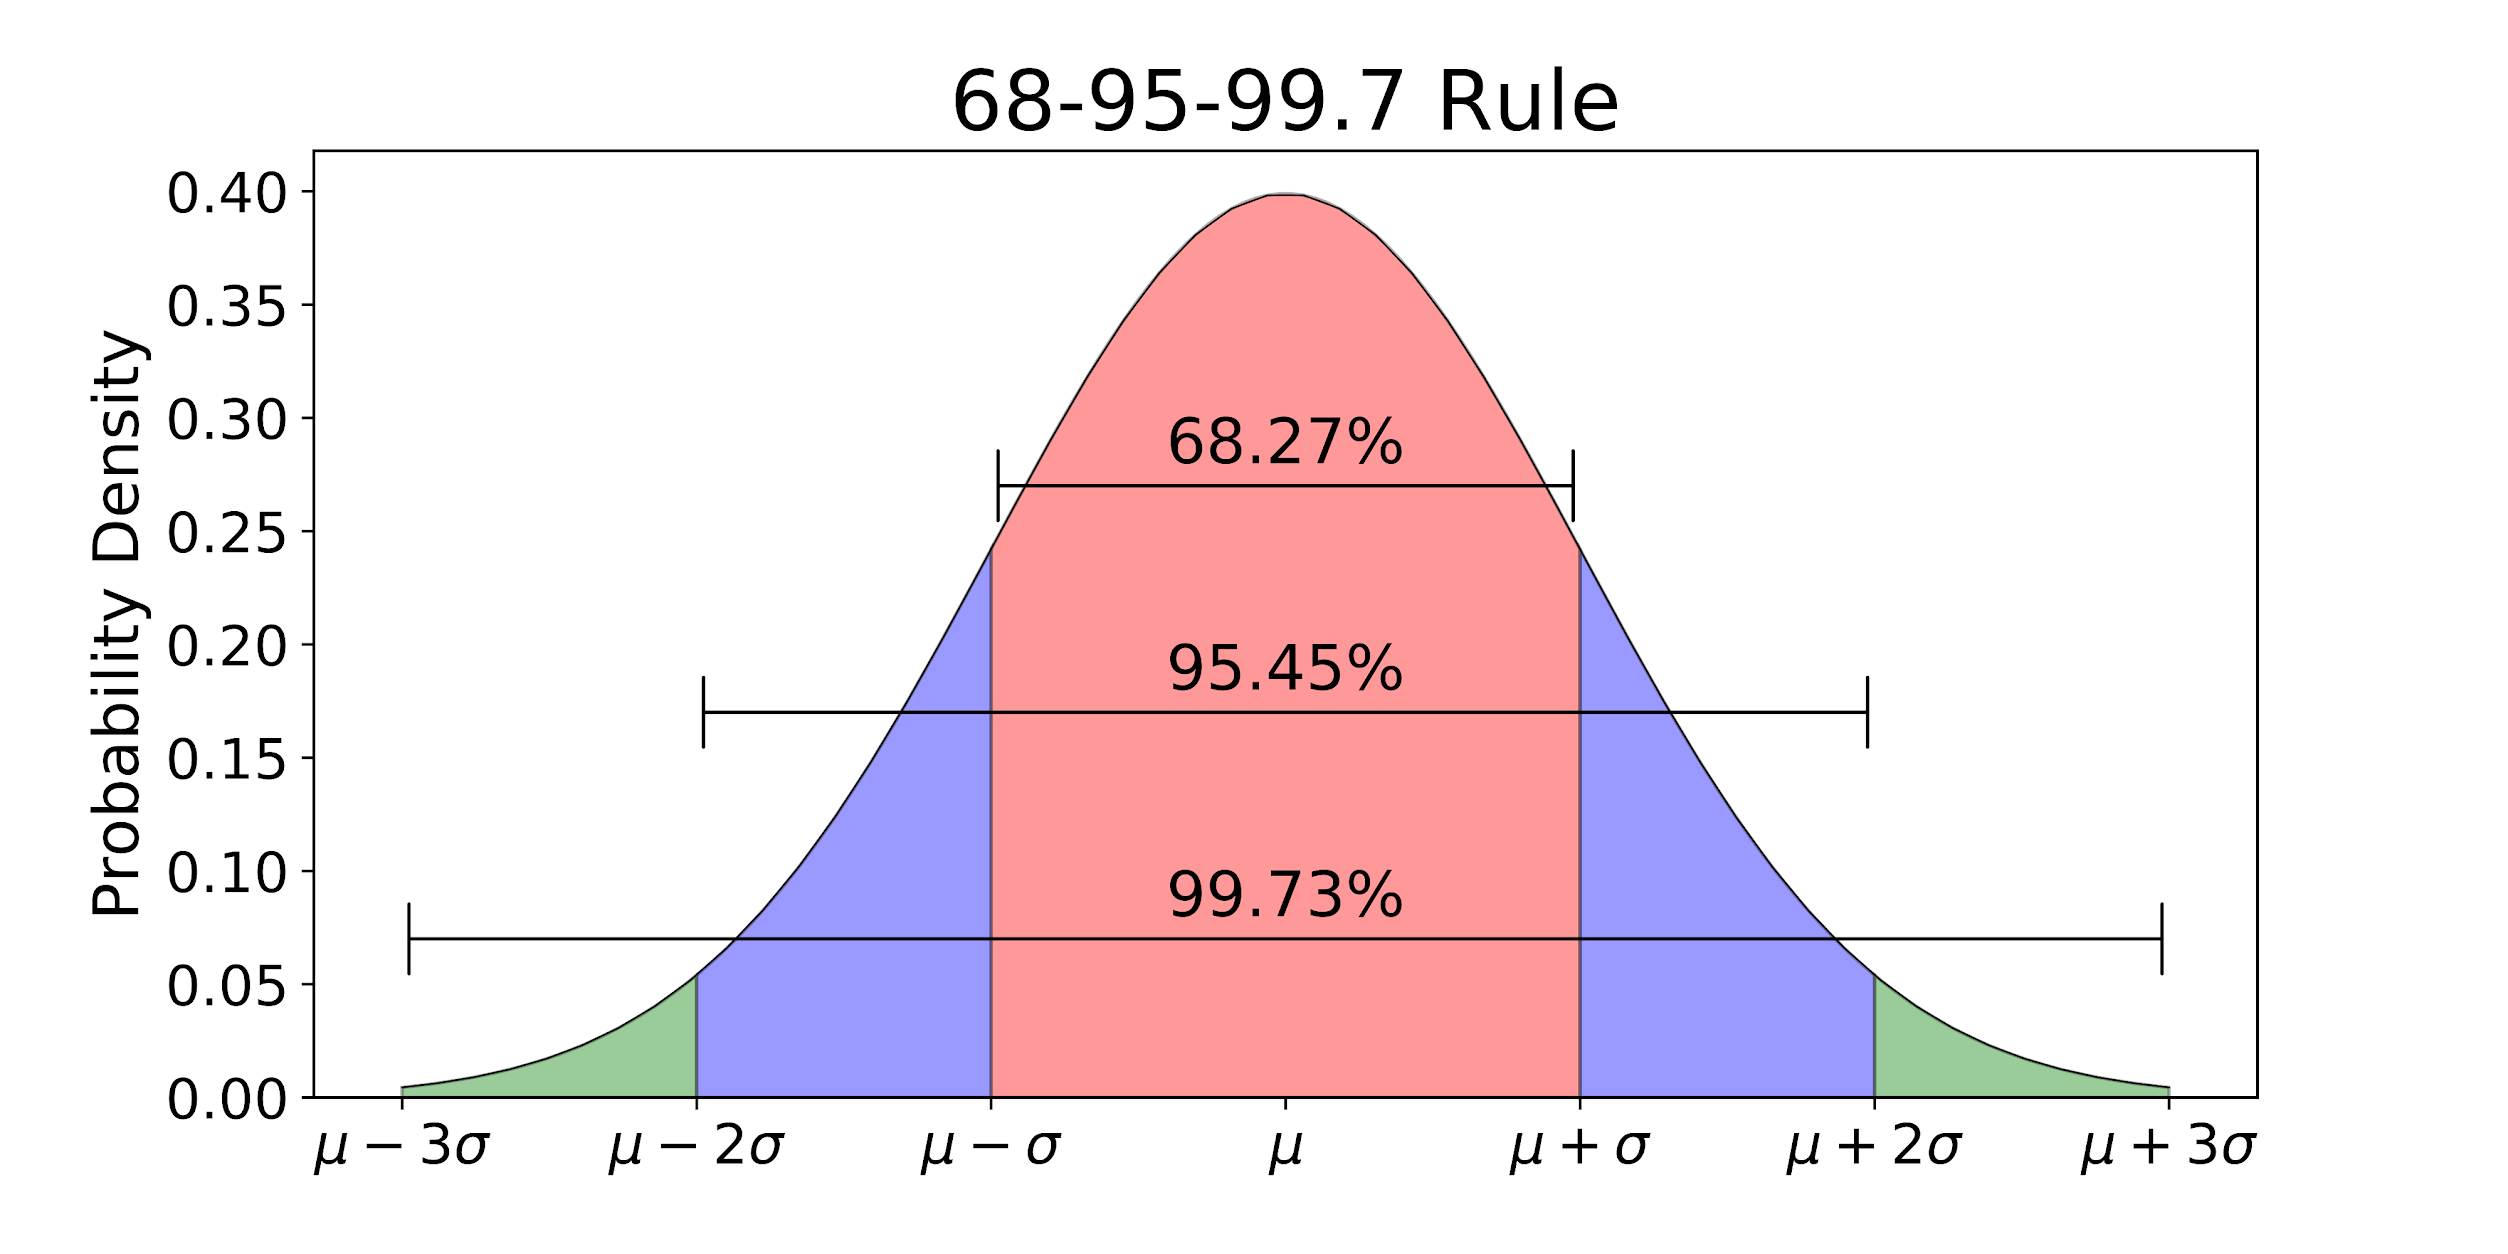

[Empiracal Rule: ](https://mste.illinois.edu/hill/dstat/sd.html)

If you will add one standard deviation to your mean and subtract one standard deviation from your mean, you should find that a majority of your scores fall between those two numbers. If you add and subtract 2 standard deviations you should find that nearly all of your scores will fall between those two numbers.`

In [ ]:
#Creating a numpy array x, and vertically stacking pickup locations and drop off locations. 

X = df[['pickup_latitude', 'pickup_longitude']] 
             

Y = df[['dropoff_latitude', 'dropoff_longitude']]

               
# Setting mean and max values by subtracting mean and standard diviation, will user further to filter abnoraml values. 

pmin_lat, pmin_lng = X.mean(axis=0) - 2*X.std(axis=0)
pmax_lat, pmax_lng = X.mean(axis=0) + 2*X.std(axis=0)

dmin_lat, dmin_lng = Y.mean(axis=0) - 2*Y.std(axis=0)
dmax_lat, dmax_lng = Y.mean(axis=0) + 2*Y.std(axis=0)


In [ ]:


def select_within_boundingbox(df):
    return ((df["pickup_longitude"] >= pmin_lng) & (df["pickup_longitude"] <= pmax_lng) & 
            (df["pickup_latitude"] >= pmin_lat) & (df["pickup_latitude"] <= pmax_lat) &
            (df["dropoff_longitude"] >= dmin_lng) & (df["dropoff_longitude"] <= dmax_lng) &
            (df["dropoff_latitude"] >= dmin_lat) & (df["dropoff_latitude"] <= dmax_lat))

In [ ]:
df = df[select_within_boundingbox(df)]

In [ ]:
df.shape

(1354583, 11)

In [ ]:
# Setting a place variable 

place_name="NYC"

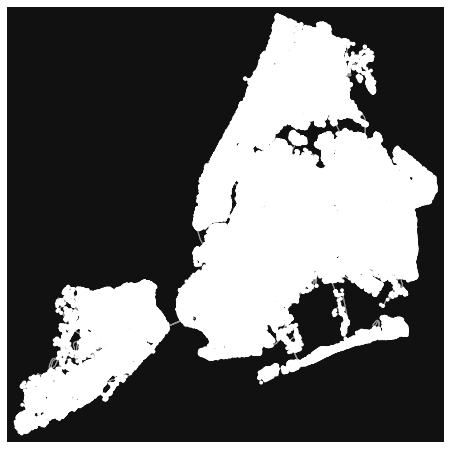

In [ ]:
#Plotting graph of NYC City 

graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

In [ ]:

nodes, edges = ox.graph_to_gdfs(graph)

<AxesSubplot:>

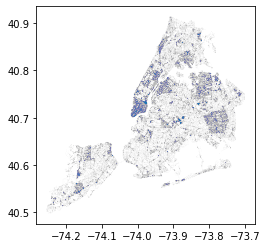

In [ ]:
#Plotting roads of NYC city 

fig, ax= plt.subplots()
edges.plot(ax=ax,linewidth=1)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00
mean,1.53,1.66,-73.98,40.75,-73.98,40.75,872.93
std,0.50,1.31,0.02,0.02,0.02,0.02,4061.30
min,1.00,0.00,-74.11,40.69,-74.11,40.68,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,384.00
50%,2.00,1.00,-73.98,40.76,-73.98,40.76,629.00
75%,2.00,2.00,-73.97,40.77,-73.97,40.77,992.00
max,2.00,8.00,-73.83,40.82,-73.83,40.82,2227612.00


Calculating driving distance 

In [ ]:
#Calculating distance based on geopy library 

def dist_calc(row):
        start = row[['pickup_longitude','pickup_latitude']]
        end = row[['dropoff_longitude', 'dropoff_latitude']]
        return distance(start, end).miles

In [ ]:
df['Distance']= df.apply(lambda row: dist_calc(row), axis=1)

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance
count,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00,1354583.00
mean,1.53,1.66,-73.98,40.75,-73.98,40.75,872.93,1.37
std,0.50,1.31,0.02,0.02,0.02,0.02,4061.30,1.56
min,1.00,0.00,-74.11,40.69,-74.11,40.68,1.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,384.00,0.51
50%,2.00,1.00,-73.98,40.76,-73.98,40.76,629.00,0.90
75%,2.00,2.00,-73.97,40.77,-73.97,40.77,992.00,1.58
max,2.00,8.00,-73.83,40.82,-73.83,40.82,2227612.00,14.22


In [ ]:
#Downloading data for further analysis 

from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>